In [1]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from shapely.geometry import Point, LineString, Polygon
from functools import partial
import pyproj
from shapely.ops import transform
import numpy as np
from geopandas import GeoDataFrame

import requests
import json
import getpass

In [2]:
core_cells = gpd.read_file("../../../data/Cidade de São Paulo/Interlagos/cells_core.geojson")

In [4]:
bairros = gpd.read_file("../../../data/Cidade de São Paulo/bairros_sp.geojson")

In [7]:
bairros = bairros[["name", "poly_type", "geometry"]]

## Merging all polygons into 1 polygon 

In [10]:
from shapely.ops import cascaded_union
from shapely.geometry import Polygon, MultiPolygon

polygons = [row.geometry for i, row in core_cells.iterrows()]
merged_polygons = cascaded_union(polygons)

if type(merged_polygons) == Polygon:
    merged_polygons = MultiPolygon([merged_polygons])

merged_gdf2 = core_cells.iloc[0:0]
merged_gdf2.loc[0, "geometry"] = merged_polygons

C:\Users\gabri\AppData\Local\Temp\ipykernel_8864\2593464792.py:5: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  merged_polygons = cascaded_union(polygons)
C:\Users\gabri\AppData\Local\Temp\ipykernel_8864\2593464792.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_gdf2.loc[0, "geometry"] = merged_polygons


In [12]:
merged_gdf = gpd.GeoDataFrame(index=[0], crs=bairros.crs, geometry=[merged_polygons])
core_cell = merged_gdf

<AxesSubplot: >

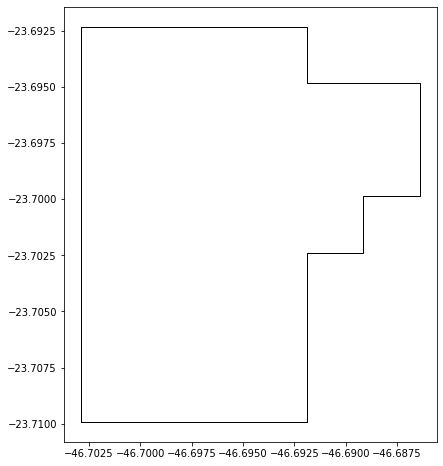

In [13]:
core_cell.plot(color="none", edgecolor='black', figsize=(12,8))

In [17]:
core_cell["poly_type"] = "core"
core_cell["name"] = "Autodromo"

core_cell['ID'] = np.arange(len(core_cell))
core_cell.set_index('ID', inplace=True)
core_cell = core_cell[["name", "poly_type", "geometry"]]
core_cell

,name,poly_type,geometry
ID,,,
0,Autodromo,core,"MULTIPOLYGON (((-46.70288 -23.70238, -46.70288..."


In [14]:
import os
dir = '../../../data/Cidade de São Paulo/Interlagos/'

if not os.path.exists(dir): 
    os.makedirs(dir)
#se essa pasta não existir, crio ela

In [18]:
core_cell.to_file(dir + 'cells_core.geojson')

In [24]:
cells_list = core_cells['cell'].tolist()

In [25]:
cells_list

[3962,
 23831,
 26399,
 59638,
 72864,
 98169,
 99508,
 106281,
 108682,
 115579,
 118284,
 123599,
 134191,
 135479,
 139433,
 144902,
 150163,
 151473,
 152809,
 218936,
 225578,
 237561,
 241565,
 241566,
 242861,
 246798,
 252039,
 253317,
 255969,
 265215]

In [26]:
core_cell

,name,poly_type,geometry
ID,,,
0,Autodromo,core,"MULTIPOLYGON (((-46.70288 -23.70238, -46.70288..."
